In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("Diabeted_Ensemble.csv")
df

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO
4,0,137,40,35,168,43.1,2.288,33,YES
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,NO
764,2,122,70,27,0,36.8,0.340,27,NO
765,5,121,72,23,112,26.2,0.245,30,NO
766,1,126,60,0,0,30.1,0.349,47,YES


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0    Number of times pregnant      768 non-null    int64  
 1    Plasma glucose concentration  768 non-null    int64  
 2    Diastolic blood pressure      768 non-null    int64  
 3    Triceps skin fold thickness   768 non-null    int64  
 4    2-Hour serum insulin          768 non-null    int64  
 5    Body mass index               768 non-null    float64
 6    Diabetes pedigree function    768 non-null    float64
 7    Age (years)                   768 non-null    int64  
 8    Class variable                768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [3]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

[' Class variable']

In [4]:
lb = LabelEncoder()

for i in categorical_features:
    df[i] = lb.fit_transform(df[i])

In [5]:
df

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
df.columns.to_list

<bound method IndexOpsMixin.tolist of Index([' Number of times pregnant', ' Plasma glucose concentration',
       ' Diastolic blood pressure', ' Triceps skin fold thickness',
       ' 2-Hour serum insulin', ' Body mass index',
       ' Diabetes pedigree function', ' Age (years)', ' Class variable'],
      dtype='object')>

In [7]:
#split data into inputs and targets
X = df.drop(columns = [' Class variable'])
y = df[' Class variable']

In [8]:
from sklearn.model_selection import train_test_split
#split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

## **Boosting**

In [9]:
from sklearn.ensemble import AdaBoostClassifier

In [10]:
ada_clf = AdaBoostClassifier(learning_rate = 0.02, n_estimators = 5000)

In [11]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [13]:
# Evaluation on Testing Data
print(confusion_matrix(y_test, ada_clf.predict(X_test)))
print(accuracy_score(y_test, ada_clf.predict(X_test)))

[[125  25]
 [ 38  43]]
0.7272727272727273


In [14]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

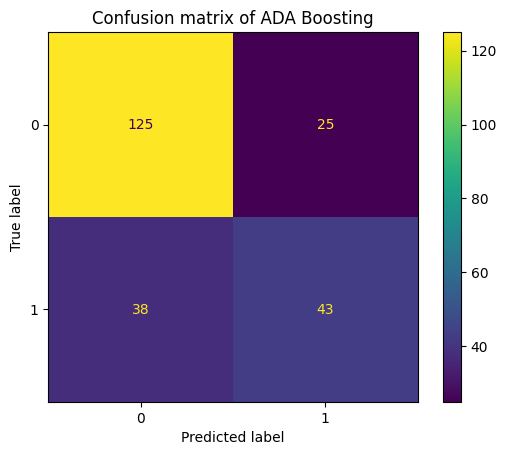

In [15]:
plot_confusion_matrix(ada_clf, X_test, y_test)
plt.title("Confusion matrix of ADA Boosting")
plt.show()

## **Bagging**

In [16]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier()
from sklearn.ensemble import BaggingClassifier

In [17]:
bag_clf = BaggingClassifier(base_estimator = clftree, n_estimators = 500,
                            bootstrap = True, n_jobs = 1, random_state = 42)

In [18]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500,
                  n_jobs=1, random_state=42)

In [19]:
# Evaluation on Testing Data
print(confusion_matrix(y_test, bag_clf.predict(X_test)))
print(accuracy_score(y_test, bag_clf.predict(X_test)))

[[123  27]
 [ 33  48]]
0.7402597402597403


In [20]:
# Evaluation on Training Data
print(confusion_matrix(y_train, bag_clf.predict(X_train)))
print(accuracy_score(y_train, bag_clf.predict(X_train)))

[[350   0]
 [  0 187]]
1.0


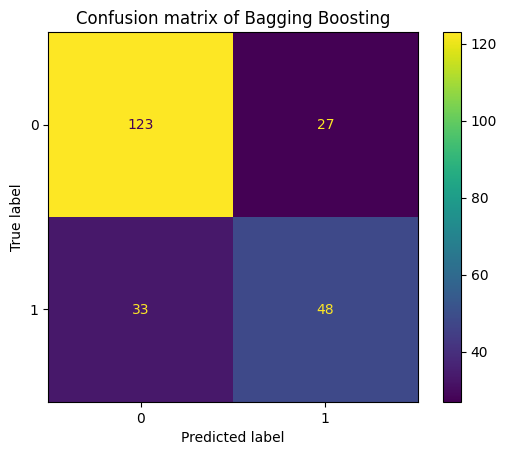

In [21]:
plot_confusion_matrix(bag_clf, X_test, y_test)
plt.title("Confusion matrix of Bagging Boosting")
plt.show()

# **Stacking**

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble  import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble  import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.linear_model import Perceptron
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import VotingClassifier
%matplotlib inline
from sklearn import model_selection
import os

## **Feature Scaling**

In [37]:
min_train = X_train.min()
range_train = (X_train - min_train).max()
X_train_scaled = (X_train - min_train)/range_train

In [39]:
min_test = X_test.min()
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/range_test

In [40]:
from sklearn.linear_model import LogisticRegression
logi = LogisticRegression()
logi.fit(X_train_scaled, y_train)

LogisticRegression()

In [41]:
y_predict = logi.predict(X_test_scaled)
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(y_test, y_predict)

acc = accuracy_score(y_test, y_predict)
prec = precision_score(y_test, y_predict)
rec = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
            columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.74026,0.705882,0.444444,0.545455,0.672222


In [42]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_scaled, y_train)

[16:01:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Program Files\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [43]:
y_predict = xgb_classifier.predict(X_test_scaled)
roc=roc_auc_score(y_test, y_predict)
acc = accuracy_score(y_test, y_predict)
prec = precision_score(y_test, y_predict)
rec = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

model_results = pd.DataFrame([['XGBOOST', acc,prec,rec, f1,roc]],
            columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.74026,0.705882,0.444444,0.545455,0.672222
1,XGBOOST,0.74026,0.714286,0.432099,0.538462,0.669383


In [44]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [45]:
y_predict = random_forest.predict(X_test_scaled)
roc=roc_auc_score(y_test, y_predict)
acc = accuracy_score(y_test, y_predict)
prec = precision_score(y_test, y_predict)
rec = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

model_results = pd.DataFrame([['Random Forest', acc,prec,rec, f1,roc]],
            columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.740260,0.705882,0.444444,0.545455,0.672222
1,XGBOOST,0.740260,0.714286,0.432099,0.538462,0.669383
2,Random Forest,0.727273,0.673077,0.432099,0.526316,0.659383


In [46]:
sgd = SGDClassifier(max_iter=1000)

sgd.fit(X_train_scaled, y_train)
y_predict = sgd.predict(X_test_scaled)

In [47]:
roc=roc_auc_score(y_test, y_predict)
acc = accuracy_score(y_test, y_predict)
prec = precision_score(y_test, y_predict)
rec = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

model_results = pd.DataFrame([['SGD', acc,prec,rec, f1,roc]],
            columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.740260,0.705882,0.444444,0.545455,0.672222
1,XGBOOST,0.740260,0.714286,0.432099,0.538462,0.669383
2,Random Forest,0.727273,0.673077,0.432099,0.526316,0.659383
3,SGD,0.601732,0.464516,0.888889,0.610169,0.667778


In [48]:
adaboost =AdaBoostClassifier()
adaboost.fit(X_train_scaled, y_train)
y_predict = adaboost.predict(X_test_scaled)

In [49]:
roc=roc_auc_score(y_test, y_predict)
acc = accuracy_score(y_test, y_predict)
prec = precision_score(y_test, y_predict)
rec = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

model_results = pd.DataFrame([['Adaboost', acc,prec,rec, f1,roc]],
            columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.740260,0.705882,0.444444,0.545455,0.672222
1,XGBOOST,0.740260,0.714286,0.432099,0.538462,0.669383
2,Random Forest,0.727273,0.673077,0.432099,0.526316,0.659383
3,SGD,0.601732,0.464516,0.888889,0.610169,0.667778
4,Adaboost,0.696970,0.666667,0.271605,0.385965,0.599136


In [50]:
gboost =GradientBoostingClassifier()
gboost.fit(X_train_scaled, y_train)
y_predict = gboost.predict(X_test_scaled)

In [51]:
roc=roc_auc_score(y_test, y_predict)
acc = accuracy_score(y_test, y_predict)
prec = precision_score(y_test, y_predict)
rec = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

model_results = pd.DataFrame([['Gboost', acc,prec,rec, f1,roc]],
            columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.740260,0.705882,0.444444,0.545455,0.672222
1,XGBOOST,0.740260,0.714286,0.432099,0.538462,0.669383
2,Random Forest,0.727273,0.673077,0.432099,0.526316,0.659383
3,SGD,0.601732,0.464516,0.888889,0.610169,0.667778
4,Adaboost,0.696970,0.666667,0.271605,0.385965,0.599136
5,Gboost,0.709957,0.640000,0.395062,0.488550,0.637531


In [52]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train_scaled, y_train)
y_predict = knn.predict(X_test_scaled)

In [53]:
roc=roc_auc_score(y_test, y_predict)
acc = accuracy_score(y_test, y_predict)
prec = precision_score(y_test, y_predict)
rec = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

model_results = pd.DataFrame([['KNN7', acc,prec,rec, f1,roc]],
            columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.740260,0.705882,0.444444,0.545455,0.672222
1,XGBOOST,0.740260,0.714286,0.432099,0.538462,0.669383
2,Random Forest,0.727273,0.673077,0.432099,0.526316,0.659383
3,SGD,0.601732,0.464516,0.888889,0.610169,0.667778
4,Adaboost,0.696970,0.666667,0.271605,0.385965,0.599136
5,Gboost,0.709957,0.640000,0.395062,0.488550,0.637531
6,KNN7,0.718615,0.625000,0.493827,0.551724,0.666914


In [54]:
from sklearn.svm import SVC 


svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)
y_predict = svc_model.predict(X_test_scaled)
roc=roc_auc_score(y_test, y_predict)
acc = accuracy_score(y_test, y_predict)
prec = precision_score(y_test, y_predict)
rec = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

model_results = pd.DataFrame([['SVC Linear', acc,prec,rec, f1,roc]],
            columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

C:\Program Files\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.740260,0.705882,0.444444,0.545455,0.672222
1,XGBOOST,0.740260,0.714286,0.432099,0.538462,0.669383
2,Random Forest,0.727273,0.673077,0.432099,0.526316,0.659383
3,SGD,0.601732,0.464516,0.888889,0.610169,0.667778
4,Adaboost,0.696970,0.666667,0.271605,0.385965,0.599136
5,Gboost,0.709957,0.640000,0.395062,0.488550,0.637531
6,KNN7,0.718615,0.625000,0.493827,0.551724,0.666914
7,SVC Linear,0.649351,0.000000,0.000000,0.000000,0.500000


# **Voting Classifier**

In [56]:
clf1=LogisticRegression()
clf2 = RandomForestClassifier()
clf3=AdaBoostClassifier()
clf4=XGBClassifier()
clf5=SGDClassifier(max_iter=1000,loss='log')
clf6=KNeighborsClassifier(n_neighbors = 7)
clf7=GradientBoostingClassifier()

eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('ada', clf3),('xgb',clf4),('sgd',clf5),('knn',clf6),('gboost',clf7)], voting='soft', weights=[1,1,2,2,1,3,2])
eclf1.fit(X_train_scaled,y_train)

C:\Program Files\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:04:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('ada', AdaBoostClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, m...
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=Non

In [57]:
eclf_predictions = eclf1.predict(X_test_scaled)
acc = accuracy_score(y_test, eclf_predictions)
prec = precision_score(y_test, eclf_predictions)
rec = recall_score(y_test, eclf_predictions)
f1 = f1_score(y_test, eclf_predictions)
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(y_test, eclf_predictions)
model_results = pd.DataFrame([['Voting Classifier ', acc,prec,rec, f1,roc]],
            columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.740260,0.705882,0.444444,0.545455,0.672222
1,XGBOOST,0.740260,0.714286,0.432099,0.538462,0.669383
2,Random Forest,0.727273,0.673077,0.432099,0.526316,0.659383
3,SGD,0.601732,0.464516,0.888889,0.610169,0.667778
4,Adaboost,0.696970,0.666667,0.271605,0.385965,0.599136
5,Gboost,0.709957,0.640000,0.395062,0.488550,0.637531
6,KNN7,0.718615,0.625000,0.493827,0.551724,0.666914
7,SVC Linear,0.649351,0.000000,0.000000,0.000000,0.500000
8,Voting Classifier,0.727273,0.673077,0.432099,0.526316,0.659383


## **Stacking**

In [59]:
clf1=LogisticRegression()
clf2 = RandomForestClassifier()
clf3=AdaBoostClassifier()
clf4=XGBClassifier()
clf5=SGDClassifier(max_iter=1000,loss='log')
clf6=GradientBoostingClassifier()
knn=KNeighborsClassifier(n_neighbors = 7)


sclf = StackingClassifier(classifiers=[clf1,clf2, clf3, clf4,clf5,clf6], 
                        meta_classifier=knn)

print('10-fold cross validation:\n')

for clf, label in zip([clf1,clf2, clf3, clf4,clf5,clf6, sclf], 
                    ['Logistic Regression'
                    'Random Forest', 
                    'Adaboost',
                        'XGB','SGD','Gradient',
                    'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X_test_scaled, y_test,
                                            cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
        % (scores.mean(), scores.std(), label))

10-fold cross validation:

Accuracy: 0.70 (+/- 0.06) [Logistic RegressionRandom Forest]
Accuracy: 0.71 (+/- 0.08) [Adaboost]
Accuracy: 0.70 (+/- 0.10) [XGB]
[17:11:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:11:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Program Files\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Program Files\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Program Files\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use 

[17:11:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:11:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Program Files\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Program Files\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:11:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:11:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Program Files\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Program Files\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Program Files\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use 

[17:11:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:11:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Program Files\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Program Files\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:11:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:11:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.69 (+/- 0.07) [SGD]
Accuracy: 0.67 (+/- 0.13) [Gradient]
Accuracy: 0.74 (+/- 0.07) [StackingClassifier]


In [60]:
import time
parameters = {
        'min_child_weight': [1, 5,7, 10],
        'max_depth': [2,3, 5,7,10,12],
        'n_estimators':[10,50,100,200]
        }

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = xgb_classifier, # Make sure classifier points to the RF model
                        param_grid = parameters,
                        scoring = "accuracy",
                        cv = 5,
                        n_jobs = -1)

t0 = time.time()
grid_search.fit(X_train_scaled, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

[17:12:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Took 27.57 seconds


C:\Program Files\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [61]:
grid_search.best_params_

{'max_depth': 2, 'min_child_weight': 10, 'n_estimators': 10}

In [62]:
grid_predictions = grid_search.predict(X_test_scaled)

In [63]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, grid_predictions)

<AxesSubplot:>

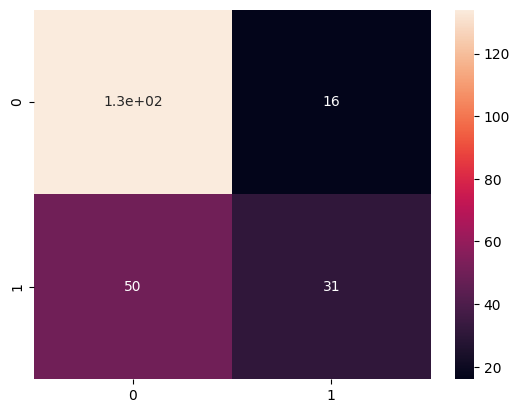

In [64]:
sns.heatmap(cm, annot=True)

In [65]:
acc = accuracy_score(y_test, grid_predictions)
prec = precision_score(y_test, grid_predictions)
rec = recall_score(y_test, grid_predictions)
f1 = f1_score(y_test, grid_predictions)
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(y_test, grid_predictions)
model_results = pd.DataFrame([['XGBoost Optimized', acc,prec,rec, f1,roc]],
            columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.740260,0.705882,0.444444,0.545455,0.672222
1,XGBOOST,0.740260,0.714286,0.432099,0.538462,0.669383
2,Random Forest,0.727273,0.673077,0.432099,0.526316,0.659383
3,SGD,0.601732,0.464516,0.888889,0.610169,0.667778
4,Adaboost,0.696970,0.666667,0.271605,0.385965,0.599136
5,Gboost,0.709957,0.640000,0.395062,0.488550,0.637531
6,KNN7,0.718615,0.625000,0.493827,0.551724,0.666914
7,SVC Linear,0.649351,0.000000,0.000000,0.000000,0.500000
8,Voting Classifier,0.727273,0.673077,0.432099,0.526316,0.659383
9,XGBoost Optimized,0.714286,0.659574,0.382716,0.484375,0.638025


In [66]:
import time
parameters = {
        'C':[0.1, 1, 10, 100,1000],
        'gamma':[1, 0.1, 0.01, 0.001,0.0001],
    'kernel':['rbf','linear']
        }

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = svc_model, # Make sure classifier points to the RF model
                        param_grid = parameters,
                        scoring = "accuracy",
                        cv = 5,
                        n_jobs = -1)

t0 = time.time()
grid_search.fit(X_train_scaled, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

Took 2.10 seconds


In [67]:
grid_search.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'linear'}

In [68]:
grid_predictions = grid_search.predict(X_test_scaled)
acc = accuracy_score(y_test, grid_predictions)
prec = precision_score(y_test, grid_predictions)
rec = recall_score(y_test, grid_predictions)
f1 = f1_score(y_test, grid_predictions)
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(y_test, grid_predictions)
model_results = pd.DataFrame([['SVC Optimized', acc,prec,rec, f1,roc]],
            columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.740260,0.705882,0.444444,0.545455,0.672222
1,XGBOOST,0.740260,0.714286,0.432099,0.538462,0.669383
2,Random Forest,0.727273,0.673077,0.432099,0.526316,0.659383
3,SGD,0.601732,0.464516,0.888889,0.610169,0.667778
4,Adaboost,0.696970,0.666667,0.271605,0.385965,0.599136
5,Gboost,0.709957,0.640000,0.395062,0.488550,0.637531
6,KNN7,0.718615,0.625000,0.493827,0.551724,0.666914
7,SVC Linear,0.649351,0.000000,0.000000,0.000000,0.500000
8,Voting Classifier,0.727273,0.673077,0.432099,0.526316,0.659383
9,XGBoost Optimized,0.714286,0.659574,0.382716,0.484375,0.638025


In [70]:
import lightgbm
train_data = lightgbm.Dataset(X_train_scaled, label=y_train)
test_data = lightgbm.Dataset(X_test_scaled, label=y_test)


#
# Train the model
#

parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'max_bin': 200,
    'boosting': 'gbdt',
    'num_leaves': 10,
    'bagging_freq': 20,
    'learning_rate': 0.003,
    'verbose': 0
}

model = lightgbm.train(parameters,
                    train_data,
                    valid_sets=test_data,
                    num_boost_round=5000,
                    early_stopping_rounds=100)

[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[1]	valid_0's binary_logloss: 0.64738
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.646905
[3]	valid_0's binary_logloss: 0.646434
[4]	valid_0's binary_logloss: 0.646006
[5]	valid_0's binary_logloss: 0.645583
[6]	valid_0's